---

# *Asset Allocation - Como determinar a contribuição de risco de um ativo*

---

<br>

- *Asset allocation, ou alocação de ativos, é uma estratégia de investimento que envolve distribuir seus recursos financeiros em **diferentes classes de ativos**, como ações, títulos, imóveis e dinheiro, com o objetivo de **otimizar o retorno esperado em relação ao risco assumido**.*

<br>

- *A alocação de ativos é baseada no princípio de que **diferentes classes de ativos têm níveis de risco e retorno diferentes**, e que a combinação certa desses ativos pode ajudar a alcançar metas financeiras específicas, como crescimento do patrimônio líquido, preservação do capital ou geração de renda.*

## *Risk Contribution*

<br>

- *A contribuição de risco (Risk Contribution) é um conceito utilizado na gestão de portfólio para entender como **cada ativo individual contribui para o risco total do portfólio**.*

<br>

- *A ideia por trás da contribuição de risco é identificar quais ativos têm maior impacto no risco geral do portfólio, permitindo aos gestores de investimento ajustarem suas alocações para alcançar um equilíbrio desejado entre risco e retorno.*

## *Fórmulas:*

<br>

- **Retorno do Portfólio:**

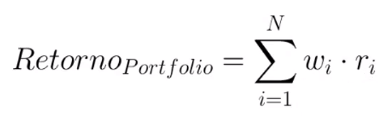


<br>

- **Volatilidade:**

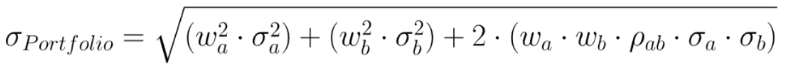


### Importações

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

### Pesos

In [2]:
ativos = ['RENDA VARIAVEL','RENDA FIXA']

pesos = np.array([0.60,0.40])

pesos = pd.DataFrame(data = {'pesos': pesos}, index = ativos)

In [3]:
pesos

,pesos
RENDA VARIAVEL,0.6
RENDA FIXA,0.4


### Volatilidade ou Risco

In [4]:
riscos = np.array([0.15,0.05])
risco = pd.DataFrame(data = {'risco':riscos}, index = ativos)
risco

,risco
RENDA VARIAVEL,0.15
RENDA FIXA,0.05


### Risco Individual

In [5]:
risco_individual = (pesos['pesos']**2) * (risco['risco']**2)
risco_individual

RENDA VARIAVEL    0.0081
RENDA FIXA        0.0004
dtype: float64

### Correlação

In [6]:
correlacao = 0.2

In [7]:
riscos_1 = (risco.loc['RENDA FIXA']) * (risco.loc['RENDA VARIAVEL'])

In [8]:
pesos_1 = (pesos.loc['RENDA FIXA']) * (pesos.loc['RENDA VARIAVEL'])

In [9]:
co_risk = correlacao * riscos_1.values * pesos_1.values
co_risk

array([0.00036])

In [10]:
sigma = risco_individual['RENDA FIXA'] + risco_individual['RENDA VARIAVEL'] + 2*(co_risk)

### Risco da carteira

In [11]:
risco_carteira = np.sqrt(sigma)
risco_carteira

array([0.09602083])

### Contribuição Marginal de Risco

In [12]:
cr_renda_fixa = (risco_individual['RENDA FIXA'] + co_risk)/sigma
cr_renda_fixa * 100

array([8.24295011])

In [13]:
cr_renda_variavel = (risco_individual['RENDA VARIAVEL'] + co_risk)/sigma
cr_renda_variavel * 100

array([91.75704989])

# *Agora podemos realizar um exemplo para uma carteira de ativos reais*

In [14]:
# Definindo parâmetros
tickers = ['AAPL', 'NVDA', 'PEP', 'JNJ', 'JURO11.SA', 'VILG11.SA', 'XPML11.SA', 'HGRU11.SA', 'CVBI11.SA', 'LVBI11.SA']
pesos = [0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10]

In [15]:
# Obtendo os dados dos ativos
dados = yf.download(tickers, start = '2020-01-01', end = '2024-03-08')['Adj Close']

[*********************100%%**********************]  10 of 10 completed


In [17]:
#Calculando o retorno diário
retorno_diario = dados.pct_change().dropna()

In [19]:
# Calculando a Volatilidade ou Risco para cada ativo
volatilidade_ativos = retorno_diario.std()

In [20]:
# Calculando a matriz de correlação entre os ativos
correlacao = retorno_diario.corr()

In [21]:
# Calcular o risco da carteira
matriz_covariancia = retorno_diario.cov()
risco_carteira = np.sqrt(np.dot(np.dot(pesos, matriz_covariancia), pesos))

In [22]:
# Calcular e plotar a Contribuição Marginal de Risco
contribuicao_marginal = np.dot(correlacao, pesos) * volatilidade_ativos * (pesos / risco_carteira)

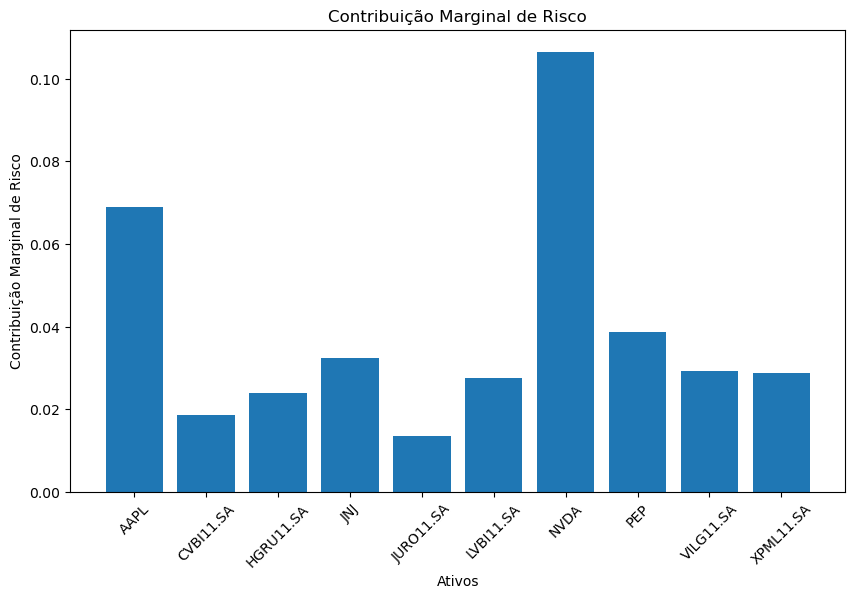

In [26]:
# Plotagem
plt.figure(figsize=(10, 6))  # Ajuste do tamanho da figura
plt.bar(dados.columns, contribuicao_marginal)
plt.title('Contribuição Marginal de Risco')
plt.xlabel('Ativos')
plt.ylabel('Contribuição Marginal de Risco')
plt.xticks(rotation=45)  # Rotaciona os rótulos no eixo x para melhor legibilidade
plt.show()
